In [2]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def display_image(image):
    plt.imshow(image,cmap='gray')

In [7]:
#read image and convert color to RGB
img = cv2.imread('./bonn.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [15]:
#Ex1:
def integral_img_own(img):
    integral_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint32)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            tl = 0 if i == 0 or j == 0 else integral_img[i-1, j-1]
            t = 0 if i == 0 else integral_img[i-1, j]
            l = 0 if j == 0 else integral_img[i, j-1]   
            integral_img[i, j] = img[i, j] + t + l - tl
    return integral_img

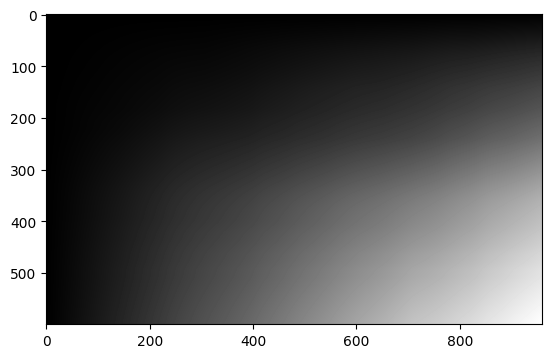

In [19]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
integral_img = integral_img_own(img_gray)
display_image(integral_img)

In [20]:
def mean_gray_sum(img,x,y,w,h):
    res = 0
    w = min(x+w,img.shape[0])
    h = min(y+h,img.shape[1])
    for i in range(x, w):
        for j in range(y, h):
            res += img[i, j]
    return res / (w-x) / (h-y)
def mean_gray_integral_CV(img,x,y,w=100,h=100, integral_img=None):
    if integral_img is None:
        integral_img  = cv2.integral(img)
    w = min(w, img.shape[0]-x)
    h = min(h, img.shape[1]-y)
    return (integral_img[x+w, y+h] - integral_img[x, y+h] - integral_img[x+w, y] + integral_img[x, y]) / w / h
def mean_gray_integral_own(img):
    integral_img = integral_img_own(img)
    return integral_img[-1, -1] / (img.shape[0] * img.shape[1])
print(mean_gray_sum(img_gray))
print(mean_gray_integral_CV(img_gray))
print(mean_gray_integral_own(img_gray))


C:\Users\dle\AppData\Local\Temp\ipykernel_18240\2759491952.py:5: RuntimeWarning: overflow encountered in scalar add
  res += img[i, j]


4.1666666666666665e-05
125.25426388888889
125.25426388888889
